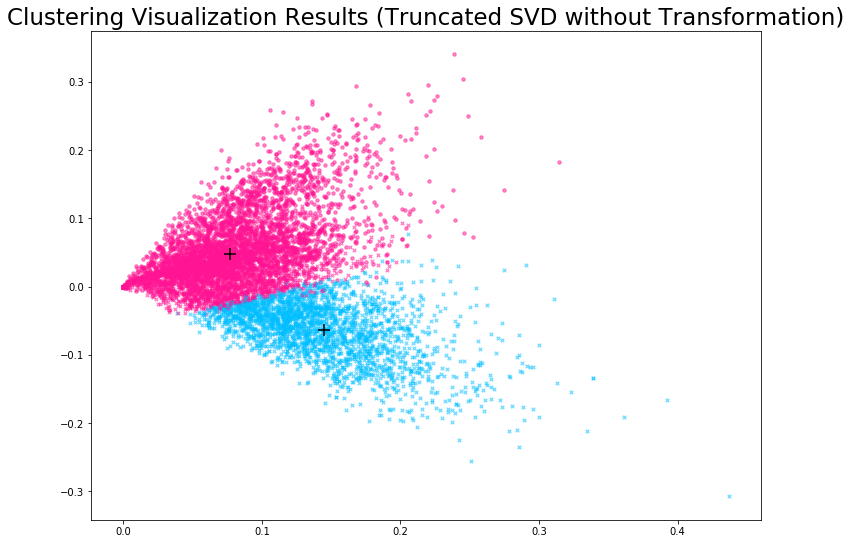

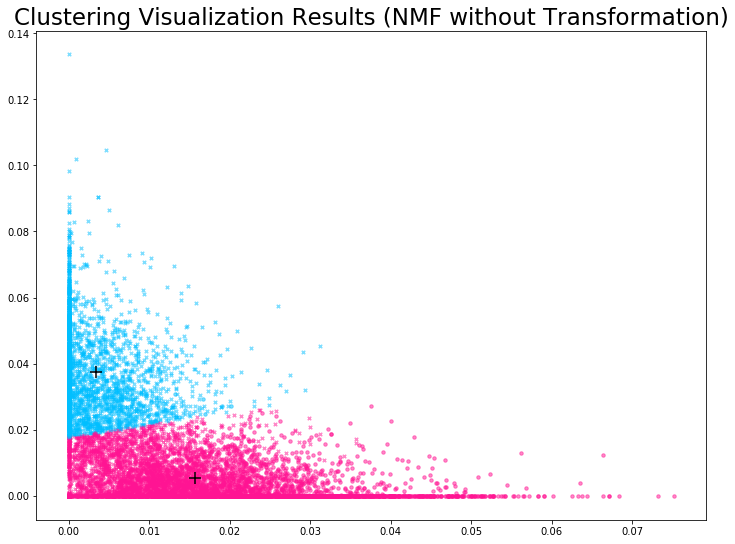

In [8]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt

# fetch original data
comp_tech_subclasses = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware']             
rec_act_subclasses = ['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
dataset = fetch_20newsgroups(subset='all', categories=comp_tech_subclasses+rec_act_subclasses, shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))

# seperate all data into two classes
labels = [1]*len(dataset.data)
for i in range(len(dataset.data)):
    if dataset.target[i] > 3:
        labels[i] = 0

# trim data
def trim_data(data_list):
    for i in range(len(data_list)):
        temp = re.findall('[a-zA-Z]+', data_list[i])
        ans = []
        for j in range(len(temp)):
            if not temp[j].isdigit():
                ans.append(temp[j])           
        data_list[i] = " ".join(ans)
        
trim_data(dataset.data)

# generate TF-IDF matrix
vectorizer = TfidfVectorizer(min_df=3, stop_words='english', use_idf=True)
X = vectorizer.fit_transform(dataset.data)

# plot clustering results
def plot_clusters(actual_labels, clustered_labels, X_2d, centers, reducer):
    plt.figure(figsize=(12,9))
    color = ["deeppink", "deepskyblue"]
    mark = ["o", "x"]
    for i in range(len(labels)):
        plt.scatter(X_2d[i, 0], X_2d[i, 1], s=12, marker=mark[actual_labels[i]], color=color[clustered_labels[i]], alpha=0.5)
    for i in range(2):
        plt.scatter(centers[i, 0], centers[i, 1], marker='+', s=150, linewidths=20, color='k')
    plt.title('Clustering Visualization Results (' + reducer + ')', fontsize=23)
    plt.show()

# 1 Truncated SVD
## reduce dimension
svd = TruncatedSVD(n_components = 10, n_iter = 10,random_state = 42)
svd_res = svd.fit_transform(X)
## K-Means Clustering
km = KMeans(n_clusters=2)
km.fit(svd_res)
clustered_labels = km.labels_
## reduce best results into 2 dimension
svd = TruncatedSVD(n_components=2, n_iter=13, random_state=42)
X_2d = svd.fit_transform(X)
km.fit(X_2d)
centers = km.cluster_centers_
## plot results
plot_clusters(labels, clustered_labels, X_2d, centers, 'Truncated SVD without Transformation')

# 2 NMF
## reduce dimension
nmf = NMF(n_components=2, init='random', random_state=0)
nmf_res = nmf.fit_transform(X)
## K-Means Clustering
km.fit(nmf_res)
clustered_labels = km.labels_
centers = km.cluster_centers_
## plot results
plot_clusters(labels, clustered_labels, nmf_res, centers, 'NMF without Transformation')
